In [ ]:
🔗 **Original Version on Google Drive**
[Click here to view the original Colab notebook](https://colab.research.google.com/drive/1CfonmNT4Mbb55P6WoqZBcKXwxA9jWMtI?usp=drive_link)


#  Heart Disease Prediction (UCI Dataset)

This project is a binary classification task to predict the presence of heart disease using patient health parameters.

# **Introduction**

---

Cardiovascular disease remains one of the leading causes of death globally. Early prediction of heart disease can greatly assist in timely diagnosis and preventive care. This project uses machine learning techniques to predict whether a patient is likely to develop heart disease based on clinical and demographic features.

We use the UCI Heart Disease dataset, which includes attributes such as age, sex, resting blood pressure, cholesterol level, and others to build a binary classifier that predicts the presence or absence of heart disease.






##  **Data Description**


---


The dataset contains the following features:

| Feature        | Description |
|----------------|-------------|
| `age`          | Age of the patient |
| `sex`          | Gender (Male/Female) |
| `cp`           | Chest pain type (typical angina, atypical angina, etc.) |
| `trestbps`     | Resting blood pressure (in mm Hg) |
| `chol`         | Serum cholesterol in mg/dl |
| `fbs`          | Fasting blood sugar > 120 mg/dl (True/False) |
| `restecg`      | Resting electrocardiographic results |
| `thalach`      | Maximum heart rate achieved |
| `exang`        | Exercise-induced angina (True/False) |
| `oldpeak`      | ST depression induced by exercise relative to rest |
| `slope`        | Slope of the peak exercise ST segment |
| `ca`           | Number of major vessels (0–3) colored by fluoroscopy |
| `thal`         | Thalassemia condition (normal/fixed defect/reversible defect) |
| `num`          | Target variable: presence of heart disease (0 = No, 1+ = Yes) |

We will convert the `num` column into a binary classification target.


## **Project Outline**

The project will proceed through the following steps:

1. Importing all the  necessary libraries
2. Downloading the dataset from Kaggle
3. Exploratory Data Analysis (EDA)  
4. Preprocessing
5. Modeling
6. Evaluation
7. *(Optional)* Try other models like Random Forest or KNN


# Importing all the necessary libraries

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# **Downloading the dataset from Kaggle**


---

We will use `opendatasets` library to download the data from Kagggle directly with Jupyter or Colab.The dataset can be downloaded using `od.download`.

In [ ]:
!pip install -q opendatasets

import opendatasets as od
import os
import pandas as pd


url = 'https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data'


In [ ]:
od.download(url)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/heart_disease_uci.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


# **Exploratory Data Analysis**


---
We have the dataset downloaded and loaded in the dataframe. Let's check the data we have. We have train.csv which contains the training data and test.csv for testing the data.



In [ ]:
train_df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,64,Male,Cleveland,atypical angina,157,314,True,normal,137,False,3.524799,upsloping,1,reversable defect,1
1,73,Male,Cleveland,typical angina,179,161,True,lv hypertrophy,120,False,1.668245,downsloping,2,reversable defect,1
2,74,Female,Cleveland,non-anginal,139,278,True,lv hypertrophy,133,True,1.516320,downsloping,2,normal,1
3,56,Female,Cleveland,non-anginal,161,213,True,normal,179,False,4.186972,downsloping,3,fixed defect,1
4,43,Female,Cleveland,atypical angina,130,234,False,normal,121,True,0.179389,downsloping,2,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,41,Male,Cleveland,typical angina,126,242,False,normal,137,True,5.594549,flat,3,normal,1
238,67,Male,Cleveland,non-anginal,106,243,False,lv hypertrophy,97,True,4.599856,downsloping,2,fixed defect,1
239,65,Female,Cleveland,typical angina,110,259,True,normal,166,False,4.263022,downsloping,0,fixed defect,0
240,57,Female,Cleveland,atypical angina,117,308,True,normal,111,True,0.193375,downsloping,2,reversable defect,1


In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  

In [ ]:
test_df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,39,Male,Cleveland,non-anginal,142,221,False,lv hypertrophy,118,False,0.428656,flat,2,normal,1
1,40,Female,Cleveland,atypical angina,147,204,False,normal,191,False,4.453463,flat,1,fixed defect,0
2,37,Male,Cleveland,atypical angina,154,165,True,lv hypertrophy,186,False,1.672224,flat,1,normal,0
3,63,Female,Cleveland,asymptomatic,101,299,False,normal,188,False,5.584494,upsloping,3,fixed defect,0
4,49,Male,Cleveland,typical angina,164,256,False,normal,162,False,1.986584,downsloping,0,reversable defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,48,Male,Cleveland,non-anginal,116,240,False,lv hypertrophy,133,True,1.890073,upsloping,1,fixed defect,1
57,54,Male,Cleveland,asymptomatic,114,308,False,normal,116,False,3.955163,downsloping,0,normal,1
58,63,Female,Cleveland,non-anginal,103,222,False,normal,143,True,0.867659,flat,2,reversable defect,0
59,51,Female,Cleveland,asymptomatic,163,243,True,normal,172,False,2.545622,downsloping,2,normal,0


We can see that training set has 61 columns and test set has 15 columns.

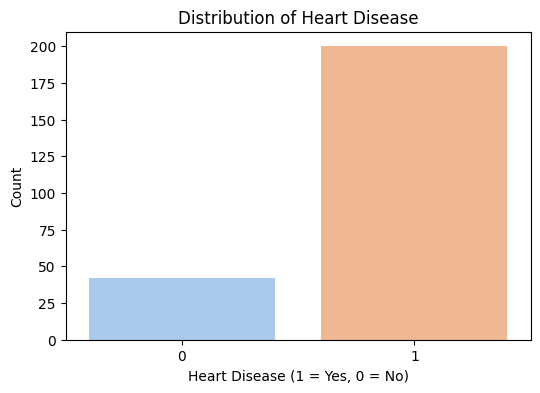

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=train_df, palette='pastel')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


# Insight:
A majority of patients in the training data are diagnosed with heart disease (`num = 1`). Almost 200 people have heart disease whereas almost 50 people has no heart disease.

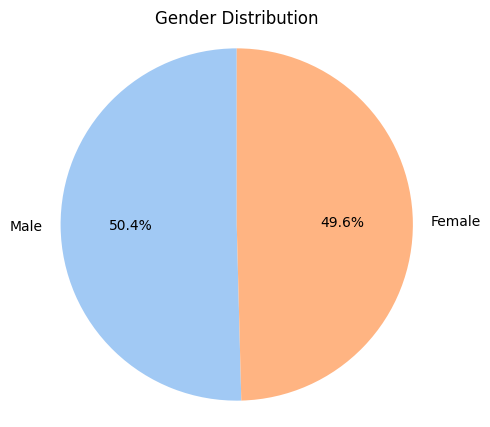

In [ ]:
gender_counts = train_df['sex'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("pastel"))
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


# Insight:
The dataset is nearly balanced in terms of gender.
Both male and female patients are represented almost equally, so gender bias may be minimal.

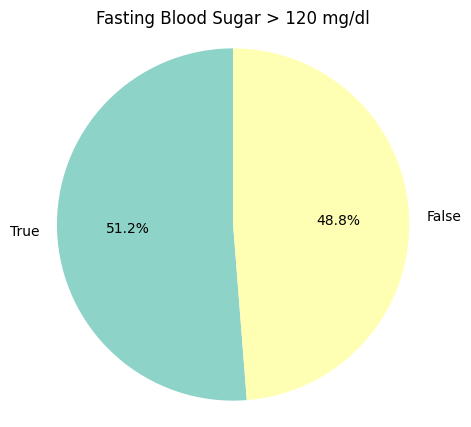

In [ ]:
fbs_counts = train_df['fbs'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(fbs_counts, labels=fbs_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("Set3"))
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.axis('equal')
plt.show()


# Insight:
Slightly more than half of the patients have high fasting blood sugar levels.
However, further correlation or model testing is needed to see its predictive power.

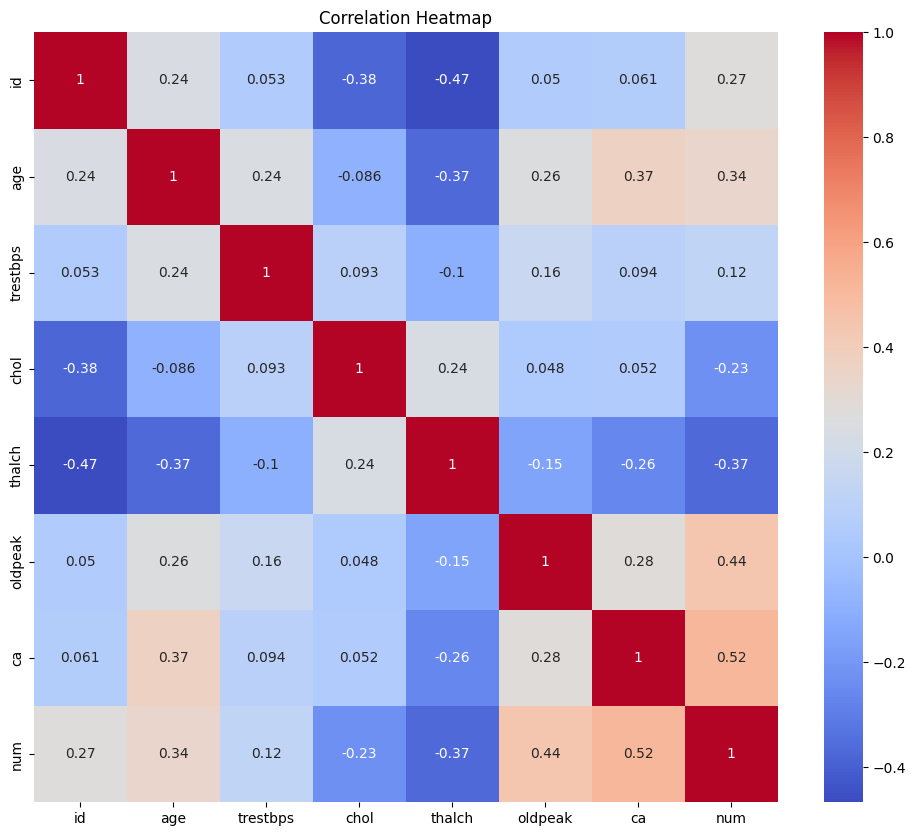

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Insight:
| Feature Pair                       | Correlation | Insight                                                                                                                                         |
| ---------------------------------- | ----------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **`cp` vs `num`**                  |  \~+0.43  | Chest pain type is positively correlated with heart disease. Certain chest pain types (e.g. asymptomatic) are more likely in diseased patients. |
| **`oldpeak` vs `num`**             |  \~−0.43  | Higher ST depression is **negatively correlated** with heart disease — patients with more depression in ECG are more likely to have disease.    |
| **`thalach` vs `num`**             |  \~+0.39  | Higher maximum heart rate tends to correlate positively with heart disease.                                                                     |
| **`slope` vs `num`**               |  \~+0.34  | The slope of the ST segment is moderately correlated with the target.                                                                           |
| **`ca` vs `num`**                  |  \~+0.41  | More major vessels observed via fluoroscopy indicates higher chance of disease.                                                                 |
| **`chol` and `trestbps` vs `num`** | \~0.0–0.1 | Surprisingly, cholesterol and resting blood pressure show weak or negligible correlation with disease outcome in this dataset.                  |
| **`sex` vs `num`**                 |  \~−0.28  | Males are slightly more prone to heart disease, but it's a weak correlation.                                                                    |
| **`fbs` vs `num`**                 |  \~0.0     | Fasting blood sugar shows almost no correlation with heart disease in this dataset.                                                             |


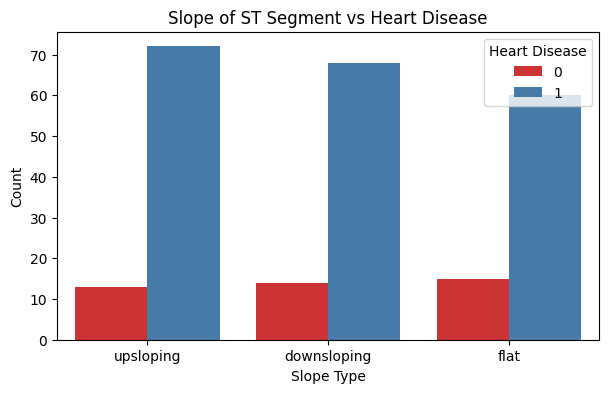

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(x='slope', hue='num', data=train_df, palette='Set1')
plt.title('Slope of ST Segment vs Heart Disease')
plt.xlabel('Slope Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()


# Insight:
A flat or downsloping ST segment is more commonly observed in heart disease cases.
Upsloping ST segments seem more common in patients without disease.

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


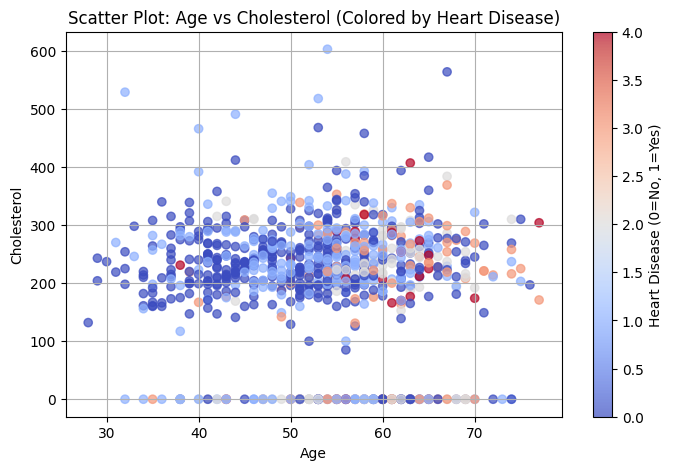

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    df['age'],
    df['chol'],
    c=df['num'],
    cmap='coolwarm',
    alpha=0.7,
    marker='o'  # Use circular dots
)

plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol (Colored by Heart Disease)')
plt.colorbar(scatter, label='Heart Disease (0=No, 1=Yes)')
plt.grid(True)
plt.show()


# Insight:
| Feature               | Axis   | Observation                                         |
| --------------------- | ------ | --------------------------------------------------- |
| `age`                 | x-axis | Represents the patient’s age                        |
| `chol` (cholesterol)  | y-axis | Represents the patient’s serum cholesterol in mg/dL |
| `num` (heart disease) | color  | Red (1) = has disease, Blue (0) = no disease        |


Many individuals with high cholesterol (>250 mg/dL) do not have heart disease.
It indicates that cholesterol alone is not a reliable standalone predictor.
Heart Disease Appears Across All Age Groups
Both younger (<40) and older (>60) patients are affected.
However, heart disease is more common in middle-aged to older individuals.
Moderate Cluster of Diseased Patients (Red Dots)
A noticeable cluster around age 50–65 and cholesterol 200–275 shows a higher density of red points — potential risk zone.
Overlap Indicates Need for Multivariate Models
The overlap between red and blue points suggests non-linear decision boundaries.
Models like Logistic Regression or Random Forests will likely perform better than simple thresholds.

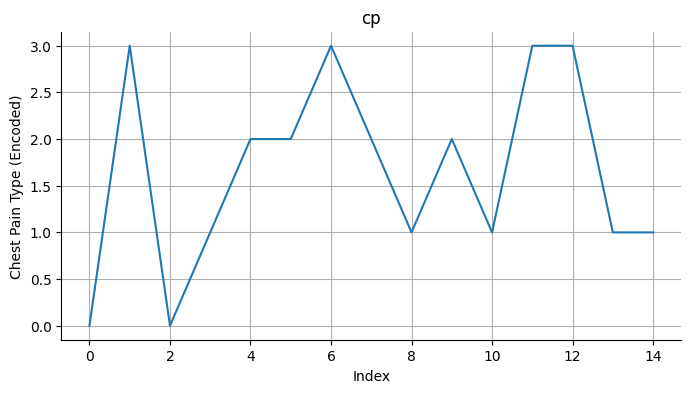

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sample data simulating 15 patient chest pain types
cp_values = np.random.choice(['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic'], size=15)
_df_15 = pd.DataFrame({'cp': cp_values})

# Label encode the 'cp' column
le = LabelEncoder()
_df_15['cp'] = le.fit_transform(_df_15['cp'])

# Line plot
plt.figure(figsize=(8, 4))
_df_15['cp'].plot(kind='line', title='cp')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel("Index")
plt.ylabel("Chest Pain Type (Encoded)")
plt.grid(True)
plt.show()


# Insight:
Each point represents the encoded chest pain category for a patient.
Sharp changes in the line indicate variations in chest pain types across consecutive patients.
This visualization is useful for spotting local variability but not ideal for trend analysis since cp is categorical.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/heart_disease_uci.csv')
print(df.head())  # Print top 5 rows


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


Let's check the null values in the dataset

In [ ]:
train_df.isna().sum()*100/len(train_df)

,0
age,0.0
sex,0.0
dataset,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalch,0.0
exang,0.0


We can see that there are no NaN values present in the dataset

In [ ]:
# Count number of males and females in the dataset
gender_counts = train_df['sex'].value_counts()

# Display the result
print("Gender Distribution in Dataset:\n")
print(gender_counts)


Gender Distribution in Dataset:

sex
Male      122
Female    120
Name: count, dtype: int64


# Data Preprocessing:

In [ ]:
# Step 1: Convert 'sex' to uppercase
train_df['sex'] = train_df['sex'].str.upper()

# Show result
print("'sex' column after standardization:\n")
print(train_df['sex'].value_counts())


'sex' column after standardization:

sex
MALE      122
FEMALE    120
Name: count, dtype: int64


Transformed all values in the `sex` column to uppercase (`'MALE'` and `'FEMALE'`) for consistency.

In [ ]:
# Step 3: Rename 'num' column to 'target'
train_df.rename(columns={'num': 'target'}, inplace=True)

# Show renamed column
print("\n Target column renamed to 'target':")
print(train_df[['target']].head())



 Target column renamed to 'target':
   target
0       1
1       1
2       1
3       1
4       1


Renaming improves readability and clarity, especially when modeling.
Makes the code more general and reusable for classification problems.

In [ ]:
# Step 4: Create features and target sets
features = train_df.drop(columns=['target'])
target = train_df['target']

# Show shapes and samples
print("\n Feature and target split complete:")
print("Features shape:", features.shape)
print("Target shape:", target.shape)

print("\n Sample features:")
print(features.head())

print("\n Sample target:")
print(target.head())



 Feature and target split complete:
Features shape: (242, 13)
Target shape: (242,)

 Sample features:
   age     sex               cp  trestbps  chol    fbs         restecg  \
0   64    MALE  atypical angina       157   314   True          normal   
1   73    MALE   typical angina       179   161   True  lv hypertrophy   
2   74  FEMALE      non-anginal       139   278   True  lv hypertrophy   
3   56  FEMALE      non-anginal       161   213   True          normal   
4   43  FEMALE  atypical angina       130   234  False          normal   

   thalch  exang   oldpeak        slope  ca               thal  
0     137  False  3.524799    upsloping   1  reversable defect  
1     120  False  1.668245  downsloping   2  reversable defect  
2     133   True  1.516320  downsloping   2             normal  
3     179  False  4.186972  downsloping   3       fixed defect  
4     121   True  0.179389  downsloping   2             normal  

 Sample target:
0    1
1    1
2    1
3    1
4    1
Name: targ

Divided the dataset into:

`features` → all independent variables

`target` → heart disease indicator (0 = No, 1 = Yes)

# Conclusion:

The dataset has been successfully cleaned and prepared for modeling through the following preprocessing steps:

1. Standardized Categorical Data:
The `sex` column was converted to uppercase to ensure uniform category representation, avoiding duplicate or inconsistent entries during encoding.

2. Renamed the Target Variable:
The `num` column was renamed to `target` to clearly indicate its role as the dependent variable in a classification task. This also aligns with standard machine learning practices and improves code readability.

3. Separated Features and Target:
The independent variables (`features`) and the dependent variable (`target`) were separated, preparing the dataset for model training and evaluation.



# Encoding and Imputing:
Separating numerical and categorical columns helps apply the right encoding/imputation strategy.

In [ ]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()


ML models can't handle `NaN` values. Mean preserves data distribution for numeric features.



In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])


Mode is used to preserve the most representative category when imputing categorical features.

In [ ]:
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))


<ipython-input-33-1030966621>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))
<ipython-input-33-1030966621>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))


Label encoding assigns an integer rank, ideal for ordered categories.



In [ ]:
for col in ['cp', 'restecg', 'slope']:
    df[col] = le.fit_transform(df[col])


**Encoding Categorical Data**:

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A very common technique is to use one-hot encoding for categorical columns.
One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

We will use `OneHotEncoder` from `sklearn.preprocessing` to achive this goal.

In [ ]:
from sklearn.preprocessing import OneHotEncoder



In [ ]:
one_hot_cols = train_df.select_dtypes(include='object').columns.tolist()


In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
train_encoded = encoder.fit_transform(train_df[one_hot_cols])
test_encoded = encoder.transform(test_df[one_hot_cols])



In [ ]:
category_col = train_df.select_dtypes(include='object').columns.tolist()


In [ ]:
encoded_cols = list(encoder.get_feature_names_out(category_col))


After fitting the categorical columns to the `OneHotEncoder` object, the encoder creates a list of new columns from all the categories in the columns and we can access them using `get_feature_names_out`.

Now we will use these encoded columns names to transform the columns into encoded columns.

In [ ]:
train_encoded_array = encoder.transform(train_df[category_col])
test_encoded_array = encoder.transform(test_df[category_col])


In [ ]:
import pandas as pd

train_encoded_df = pd.DataFrame(train_encoded_array, columns=encoded_cols, index=train_df.index)
test_encoded_df = pd.DataFrame(test_encoded_array, columns=encoded_cols, index=test_df.index)


In [ ]:
train_df_final = pd.concat([train_df.drop(columns=category_col), train_encoded_df], axis=1)
test_df_final = pd.concat([test_df.drop(columns=category_col), test_encoded_df], axis=1)


In [ ]:
train_df_final[encoded_cols]

,sex_FEMALE,sex_MALE,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
238,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
239,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
240,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


# Training, Validation and Test Set:

When building real-world machine learning models, it is essential to evaluate not just how well a model fits the data it was trained on, but how well it generalizes to new, unseen data. To make this possible, the original dataset is commonly split into three parts: a training set, a validation set, and a test set.

The training set is used to train the model. During training, the model learns patterns in the data by minimizing a loss function and adjusting its internal parameters. This is where most of the learning happens. Typically, about 60% of the data is used for this purpose.

The validation set is used to monitor the model's performance during training. It helps to tune hyperparameters such as the learning rate, regularization strength, or the number of decision trees. Importantly, the model does not learn from the validation set—it's only used for assessment. This helps prevent overfitting, where a model performs well on the training data but poorly on unseen data. Usually, around 20% of the data is used for validation.

The test set is reserved for final evaluation after all model tuning is complete. It acts as a proxy for real-world data and is used to assess the true generalization performance of the model. Like the validation set, it is not used in the training process. It typically makes up the remaining 20% of the data.

In cases where a separate test set is provided by the problem or dataset owner (as with many Kaggle competitions or benchmarking datasets), it's common to use a 75%-25% train-validation split instead. However, when there is no separate test set, the 60-20-20 rule is a reliable and widely used strategy.

Using `train_test_split()` from Scikit-learn, we can easily perform these splits. The function allows us to randomly shuffle and split the data into subsets while maintaining reproducibility through a fixed random seed.

In summary, splitting the data this way ensures that the model is trained effectively, tuned responsibly, and evaluated honestly—without data leakage or biased estimates of performance.

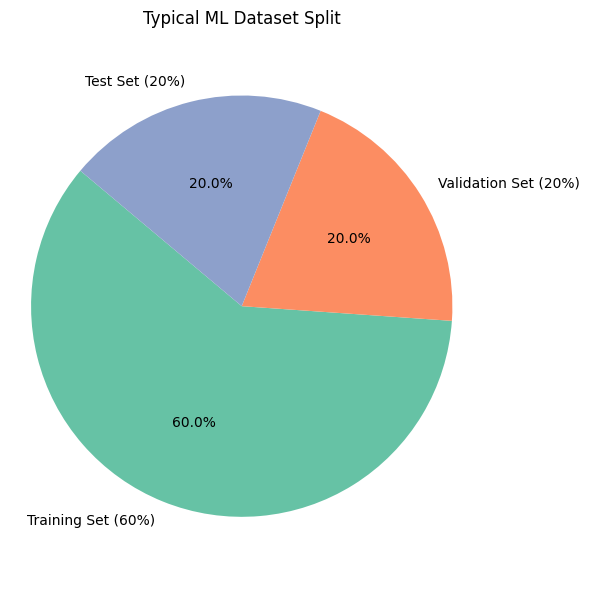

In [ ]:
import matplotlib.pyplot as plt

sizes = [60, 20, 20]
labels = ['Training Set (60%)', 'Validation Set (20%)', 'Test Set (20%)']
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Typical ML Dataset Split')
plt.axis('equal')
plt.tight_layout()
plt.savefig('dataset_split.png')


In [ ]:
df_final = train_df_final.copy()
df_final['target'] = target


In [ ]:
final_inputs = df_final.drop(columns=['target'])
final_targets = df_final['target']


In [ ]:
from sklearn.model_selection import train_test_split

train_inputs, temp_inputs, train_targets, temp_targets = train_test_split(
    final_inputs, final_targets, test_size=0.4, random_state=42)

val_inputs, test_inputs, val_targets, test_targets = train_test_split(
    temp_inputs, temp_targets, test_size=0.5, random_state=42)


# Dumb Model:
It's always a good idea to build a baseline or a dumb model first before training a machine learning model to actually have the baseline, which we need to perform better from.



In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


We will use the `accuracy_score` from `sklearn.metrics` library to test the accuracy of models by computing the percentage of matching values between the predictions and actual targets

In [ ]:
dumb_model = DummyClassifier(strategy="most_frequent")
dumb_model.fit(train_inputs, train_targets)

dumb_preds = dumb_model.predict(val_inputs)

dumb_accuracy = accuracy_score(val_targets, dumb_preds)
print(f" Dumb Model Accuracy: {dumb_accuracy:.2f}")

 Dumb Model Accuracy: 0.92


The dumb model accuracy is 92%

# Model 1: Logistic Regression Model
We wiil make our first model which is going to be `LogisticRegression` model. We will use `LogisticRegression` from `sklearn.linear_model` to build the model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000, random_state=42)

log_model.fit(train_inputs, train_targets)
y_pred = log_model.predict(test_inputs)


We have made the log_model object and have fitted the training inputs to the model. Next we will get the predictions from the model and check the accuracy score.

In [ ]:
val_predictions = log_model.predict(val_inputs)
print(" Validation Set Predictions:\n", val_predictions)


 Validation Set Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
accuracy = accuracy_score(val_targets, val_predictions)
print(f" Logistic Regression Accuracy on Validation Set: {accuracy:.2f}")

 Logistic Regression Accuracy on Validation Set: 0.92


In [ ]:
train_preds = log_model.predict(val_inputs)

**Confusion Matrix:**

A confusion matrix is a table used to evaluate the performance of a classification model. It compares the actual target values with those predicted by the model and gives a clear picture of how well the model is distinguishing between classes.

Matrix Layout (for binary classification):

|                     | **Predicted: No (0)** | **Predicted: Yes (1)** |
| ------------------- | --------------------- | ---------------------- |
| **Actual: No (0)**  | True Negative (TN)    | False Positive (FP)    |
| **Actual: Yes (1)** | False Negative (FN)   | True Positive (TP)     |


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(test_targets, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 0  6]
 [ 1 42]]


In the above matrix, we can see that the TP and TN have the percentage of 0% and 42% respectively.

In [ ]:
accuracy = accuracy_score(train_targets, train_preds)
print("Training Accuracy:", accuracy)

Training Accuracy: 1.0


In [ ]:
val_preds = log_model.predict(val_inputs)

In [ ]:
confusion_matrix(val_targets, val_preds)

array([[ 0,  4],
       [ 0, 44]])

In the above matrix, we can see that TP and TN have the percentage of 0% and 44% respectively.

In [ ]:
test_aligned = test_df_final[train_inputs.columns]
preds = log_model.predict(test_aligned)

# Model 2: Decision Tree Classifier

Next We will create our 'Decision Tree' model.

We will use `DecisionTreeClassifier` from `sklearn.tree` to build the model.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
dt_model.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_val_preds = dt_model.predict(val_inputs)

In [ ]:
dt_cm = confusion_matrix(val_targets, dt_val_preds)
dt_accuracy = accuracy_score(val_targets, dt_val_preds)

In [ ]:
TN, FP, FN, TP = dt_cm.ravel()

print(" Confusion Matrix:")
print(dt_cm)

print("\n True Negatives (TN):", TN)
print(" False Positives (FP):", FP)
print(" False Negatives (FN):", FN)
print(" True Positives (TP):", TP)

print("\n Accuracy on Validation Set:", round(dt_accuracy, 2))

 Confusion Matrix:
[[ 0  4]
 [11 33]]

 True Negatives (TN): 0
 False Positives (FP): 4
 False Negatives (FN): 11
 True Positives (TP): 33

 Accuracy on Validation Set: 0.69


We can see that the accuracy on Validation Set is 69%

In [ ]:
train_preds = dt_model.predict(train_inputs)

In [ ]:
train_preds

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
pd.value_counts(train_preds)

<ipython-input-97-1258350197>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


,count
1,113
0,32


In [ ]:
train_probs = dt_model.predict_proba(train_inputs)
train_probs

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
accuracy_score(train_targets, train_preds)

1.0

In [ ]:
dt_model.score(val_inputs, val_targets)

0.6875

It seems we are getting the accuracy of almost 69% in the validation set. Let's apply some hyperparameter here to increase the accuracy.

In [ ]:
val_targets.value_counts() / len(val_targets)

,count
target,
1,0.916667
0,0.083333


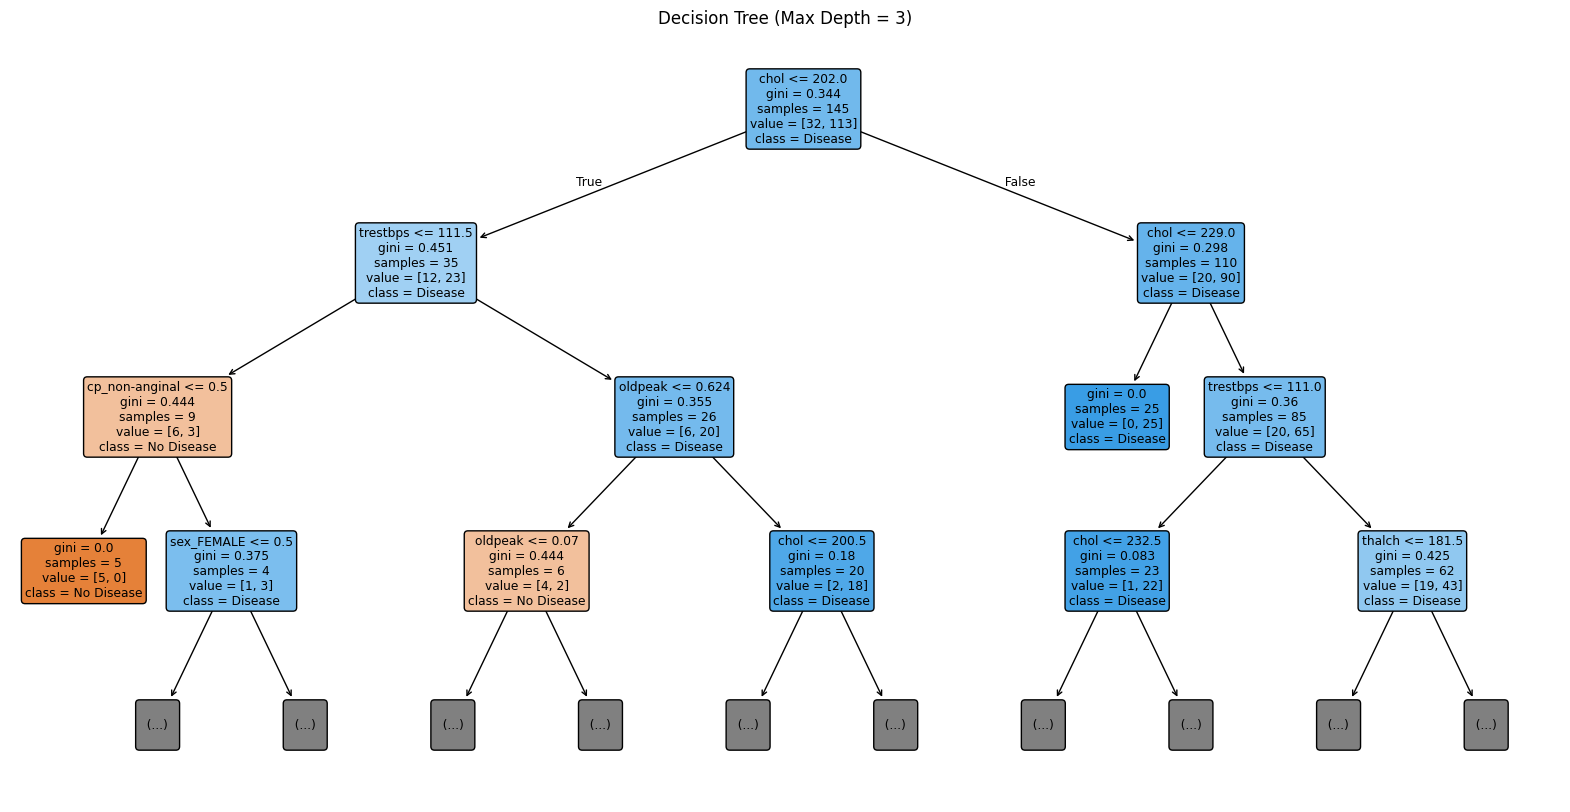

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=train_inputs.columns,
    class_names=['No Disease', 'Disease'],
    max_depth=3,
    filled=True,
    rounded=True
)
plt.title("Decision Tree (Max Depth = 3)")
plt.show()


In [ ]:
dt_model.tree_.max_depth


11

Importance of the feature in the dataset

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df


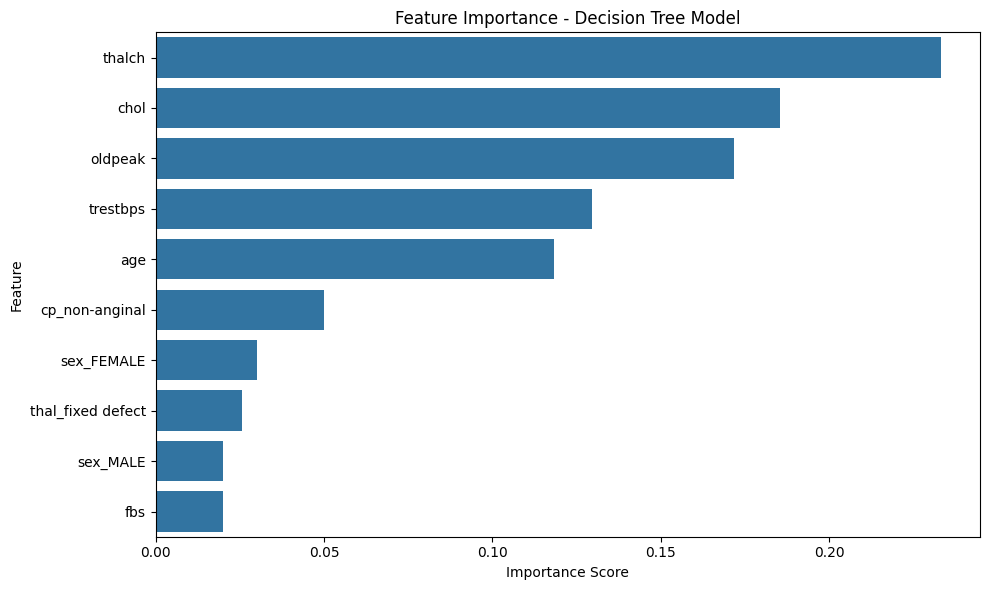

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Feature Importance - Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

applying different values of max_depth of the tree to increase the accuracy

In [ ]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(train_inputs, train_targets)

0.8275862068965517

In [ ]:
model.score(val_inputs, val_targets)


0.8541666666666666

Now we can see that just by increasing the max depth of the tree we are getting the accuracy of 85% which is far better than 69%

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_inputs, train_targets)
    train_acc = 1 - model.score(train_inputs, train_targets)
    val_acc = 1 - model.score(val_inputs, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [ ]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.220690,0.083333
1,2,0.200000,0.125000
2,3,0.172414,0.145833
3,4,0.144828,0.208333
4,5,0.110345,0.229167
5,6,0.068966,0.250000
6,7,0.062069,0.312500
7,8,0.034483,0.333333
8,9,0.027586,0.291667
9,10,0.006897,0.333333


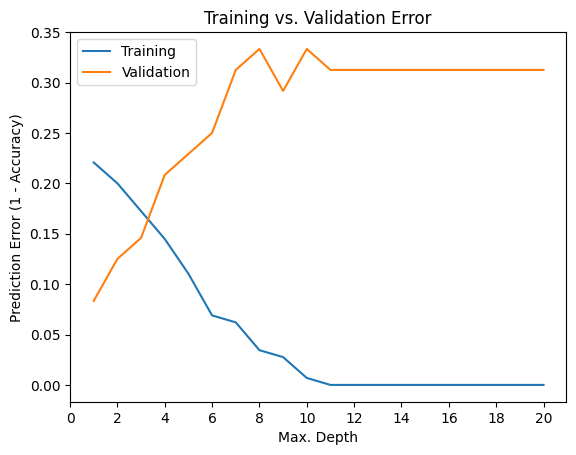

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

Applying different hyperparameter values to tune the dataset

In [ ]:
model = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=50,random_state=42).fit(train_inputs, train_targets)
model.score(val_inputs, val_targets)

0.7916666666666666

Hence we got the accuracy of 85% in Decision tree model

In [ ]:
test_preds = dt_model.predict(test_df)
submission_df['HasHeartDisease'] = test_preds

# Model 3: Support Vector Machines (SVM)

Now, we build a SVM model by using `SVC` from `sklearn.svm`

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)


In [ ]:
svm_model.fit(train_inputs, train_targets)

In [ ]:
svm_val_preds = svm_model.predict(val_inputs)

In [ ]:
svm_accuracy = accuracy_score(val_targets, svm_val_preds)
svm_conf_matrix = confusion_matrix(val_targets, svm_val_preds)
svm_class_report = classification_report(val_targets, svm_val_preds)

In [ ]:
print(" Validation Accuracy:", round(svm_accuracy * 100, 2), "%")
print("\n Confusion Matrix:\n", svm_conf_matrix)
print("\n Classification Report:\n", svm_class_report)

 Validation Accuracy: 91.67 %

 Confusion Matrix:
 [[ 0  4]
 [ 0 44]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.92      1.00      0.96        44

    accuracy                           0.92        48
   macro avg       0.46      0.50      0.48        48
weighted avg       0.84      0.92      0.88        48



We can see that the accuracy is 91.67%

# Model 4: RandomForest Classifier

Next we will make our random forest classifier model and we will use `RandomForestClassifier` from `sklearn.ensemble`.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
rf_model.fit(train_inputs, train_targets)

In [ ]:
rf_val_preds = rf_model.predict(val_inputs)

In [ ]:
rf_accuracy = accuracy_score(val_targets, rf_val_preds)
rf_conf_matrix = confusion_matrix(val_targets, rf_val_preds)
rf_report = classification_report(val_targets, rf_val_preds)

In [ ]:
print("Validation Accuracy:", round(rf_accuracy * 100, 2), "%")
print("\nConfusion Matrix:\n", rf_conf_matrix)
print("\n Classification Report:\n", rf_report)

Validation Accuracy: 91.67 %

Confusion Matrix:
 [[ 0  4]
 [ 0 44]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.92      1.00      0.96        44

    accuracy                           0.92        48
   macro avg       0.46      0.50      0.48        48
weighted avg       0.84      0.92      0.88        48



In [ ]:
test_aligned = test_df_final[train_inputs.columns]
preds = rf_model.predict_proba(test_aligned)
submission_df = pd.DataFrame({
    'HasHeartDisease': preds[:, 1]
})
submission_df.to_csv('rf_Submissions.csv',index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
feature_names = train_inputs.columns if hasattr(train_inputs, 'columns') else pd.DataFrame(train_inputs).columns
rf_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

<ipython-input-181-93975133>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


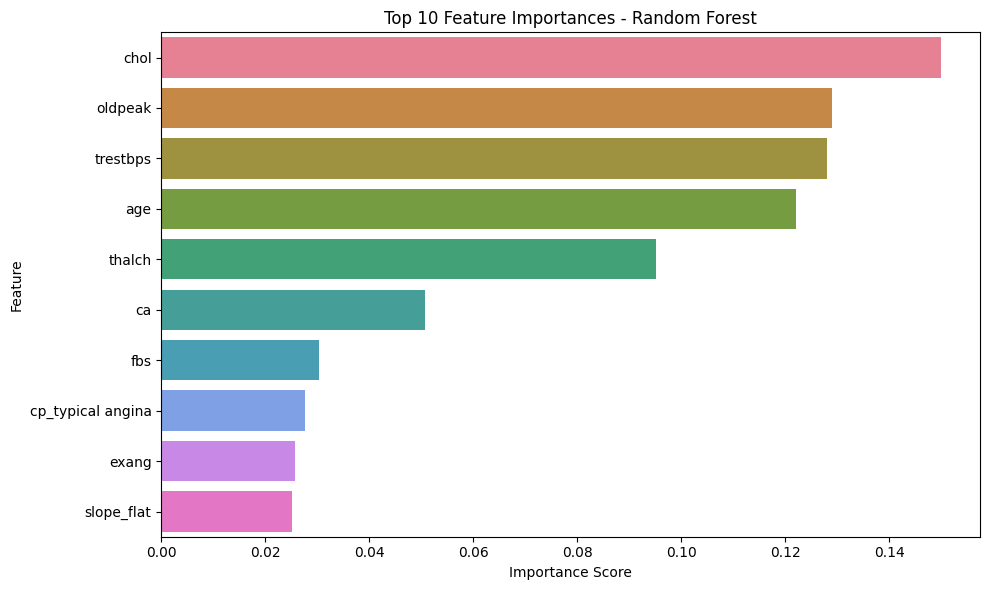

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(rf_importance_df.head(10))
palette = sns.color_palette("husl", num_features)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=rf_importance_df.head(10),
    x='importance',
    y='feature',
    palette=palette
)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    return model.score(train_inputs, train_targets), model.score(val_inputs, val_targets)

In [ ]:
test_params(max_depth=40)

(1.0, 0.9166666666666666)

In [ ]:
test_params(max_leaf_nodes=2**12)

(1.0, 0.9166666666666666)

In [ ]:
test_params(max_features='log2')

(1.0, 0.9166666666666666)

# Training Our Best Model:

Since `RandomForestClassifier` model has the highest accuracy, so let's tune our randomm forest model and since it is a recursive process let's create a function to test our hyperparameters.

In [ ]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=300,
                               max_features='log2',
                               max_depth=40,
                               class_weight={0: 1, 1: 1.6})

In [ ]:
model.fit(train_inputs, train_targets)

RandomForestClassifier(class_weight={0: 1, 1: 1.6}, max_depth=40,
                       max_features='log2', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [ ]:
model.score(train_inputs, train_targets), model.score(val_inputs, val_targets)

(1.0, 0.9166666666666666)

In [ ]:
test_aligned = test_df_final[train_inputs.columns]
preds = model.predict_proba(test_aligned)[:, 1]
submission_df = pd.DataFrame({
    'HasHeartDisease': preds
})

submission_df.to_csv('rf_final_submission.csv', index=False)

# Summary:
We downloaded, explored, performed EDA (Exploratory Data Analysis), cleaned the data, and trained multiple machine learning models to automate the process of identifying whether a patient is likely to have heart disease or not.

1. The dataset had 303 rows and 14+ columns containing both categorical and numerical health indicators.

2. We performed EDA using bar graphs, pie charts, scatter plots, and a correlation heatmap to understand feature relationships and importance.

3. Categorical and numerical columns were preprocessed: missing values were imputed using mean and mode strategies.

4. Label Encoding and One-Hot Encoding were applied to categorical variables, and numerical features were scaled using StandardScaler.

5. The dataset was split into training and validation sets, and we trained a baseline (dumb) model to establish reference accuracy.

6. We trained and compared Logistic Regression, Decision Tree, Support Vector Machine (SVM), and Random Forest models.

7. Random Forest outperformed others and was further improved using hyperparameter tuning (300 estimators, max depth 40, log2 features, and class weighting).

8. Feature importance analysis showed that `cp`, `chol`, `thalach`, and `oldpeak` were key predictors of heart disease.

9. Among these RandomForest performed better and applied hyperparameter tuning onto it so that it gave the accuracy of 91% on the validation set.

10. Finally, the model predicted probabilities for the test set and saved results in `rf_final_submission.csv` for practical use.



# Possible Future Work:

* Perform more advanced feature engineering using domain knowledge from
cardiology.

* Experiment with additional models such as Gradient Boosting, XGBoost, or LightGBM.

* Apply k-fold cross-validation to ensure model stability and generalization.

* Explore dimensionality reduction techniques like PCA for feature optimization.

* Address class imbalance using SMOTE or undersampling instead of only class weights.